### Notebook for running SONATA on scNMT dataset
Below, we replicate our results for scNMT dataset reported in *Securing diagonal integration of multimodal single-cell data against ambiguous mapping*




In [1]:
import os
import yaml
from sklearn.preprocessing import normalize

import sys
sys.path.insert(1, '../src/')
import sonata
from run_baselines.scot import scotv1
from utils.utils import *
from utils.vis import *

In [2]:
# load parameters and datasets
with open("./cfgs/scNMT.yaml", "r") as file:
        params = yaml.safe_load(file)
        
data_url1 = os.path.join(params["data_path"], params["data_url1"])
data_url2 = os.path.join(params["data_path"], params["data_url2"])
print("data url1 = {}\ndata url2 = {}".format(data_url1, data_url2))
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join(params["data_path"], params["label_url1"])
label_url2 = os.path.join(params["data_path"], params["label_url2"])
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

if params["norm"]: 
        data1 = normalize(data1, norm=params["norm"])
        data2 = normalize(data2, norm=params["norm"])

if params["sort"]: 
        data1, label1, _ = sorted_by_label(data1, label1)
        data2, label2, _ = sorted_by_label(data2, label2)

save_path = params["save_dir"]
print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))


data url1 = ../data/scNMT/Paccessibility_300.txt
data url2 = ../data/scNMT/Pmethylation_300.txt
data size: data1 = (612, 300), data2 = (709, 300)
data1 shape=(612, 300)	data2 shape=(709, 300)
label1 shape=(612,)	label2 shape=(709,)


### 1. visualize two modalities

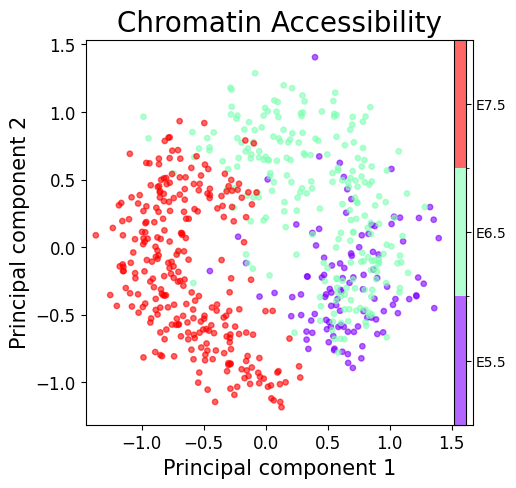

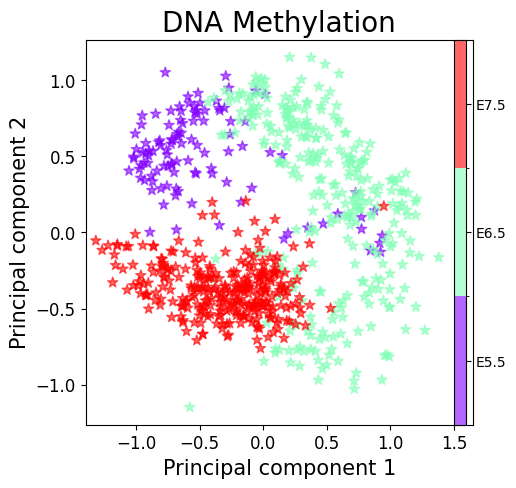

In [3]:
plt_domain_bio_labels(data1, label1, title="Chromatin Accessibility", y_tick_labels=["E5.5", "E6.5", "E7.5"], marker='.', a=0.6, show=True)
plt_domain_bio_labels(data2, label2, title="DNA Methylation", y_tick_labels=["E5.5", "E6.5", "E7.5"], marker='*', a=0.6, show=True)

### 2. SONATA Diagnose

##### 2.1 Diagnose Modality1

In [4]:
sn1 = sonata.sonata(params)
DiagnoseResult1 = sn1.diagnose_by_groups(data1, save_dir=os.path.join(params['save_dir'], "Modality1"))

/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


---------------Coupling Denoising Iter=0--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter0.txt
---------------Coupling Denoising Iter=1--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter1.txt
---------------Coupling Denoising Iter=2--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter2.txt
---------------Coupling Denoising Iter=3--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter3.txt
---------------Coupling Denoising Iter=4--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter4.txt
---------------Coupling Denoising Iter=5--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter5.txt
---------------Coupling Denoising Iter=6--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_it

/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/

N clusters found by the algorithm = 3
Cluster labels = [0 0 0 1 1 1 1 2 1 1]
---------------Coupling Denoising Iter=0--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter0.txt
---------------Coupling Denoising Iter=1--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter1.txt
---------------Coupling Denoising Iter=2--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter2.txt
---------------Coupling Denoising Iter=3--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter3.txt
---------------Coupling Denoising Iter=4--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter4.txt
---------------Coupling Denoising Iter=5--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality1/coupling_iters/coupling_iter5.txt
---------------Coupling Denoising Iter=6--------------
Load

Ambiguous type: 0


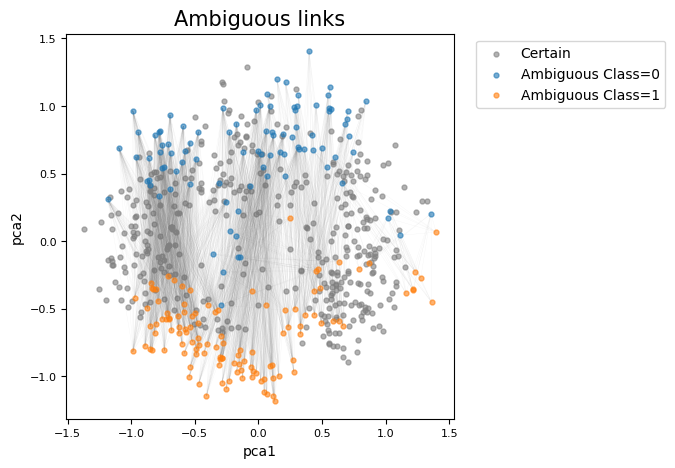

Ambiguous type: 1


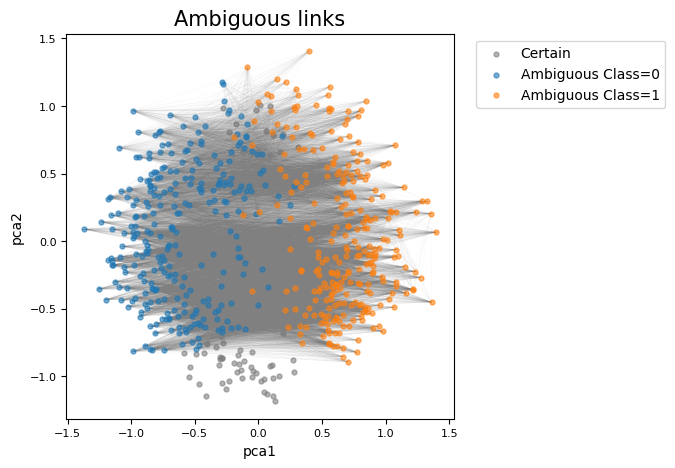

In [5]:
for idx, DiagnoseResult in enumerate(DiagnoseResult1):
    print("Ambiguous type: {}".format(idx))
    plt_cannotlink_by_labelcolor(data1, DiagnoseResult.ambiguous_idx, DiagnoseResult.ambiguous_labels, DiagnoseResult.cannot_links, alpha=0.6, cl_alpha = 0.1, show=True)

#### 2.2 Diagnose Modality 2

In [6]:
sn2 = sonata.sonata(params)
DiagnoseResult2 = sn2.diagnose(data2, save_dir=os.path.join(params['save_dir'], "Modality2"))

/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


---------------Coupling Denoising Iter=0--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality2/coupling_iters/coupling_iter0.txt
---------------Coupling Denoising Iter=1--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality2/coupling_iters/coupling_iter1.txt
---------------Coupling Denoising Iter=2--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality2/coupling_iters/coupling_iter2.txt
---------------Coupling Denoising Iter=3--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality2/coupling_iters/coupling_iter3.txt
---------------Coupling Denoising Iter=4--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality2/coupling_iters/coupling_iter4.txt
---------------Coupling Denoising Iter=5--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality2/coupling_iters/coupling_iter5.txt
---------------Coupling Denoising Iter=6--------------
Load_path = ../results/sonata_pipeline/scNMT/Modality2/coupling_iters/coupling_it

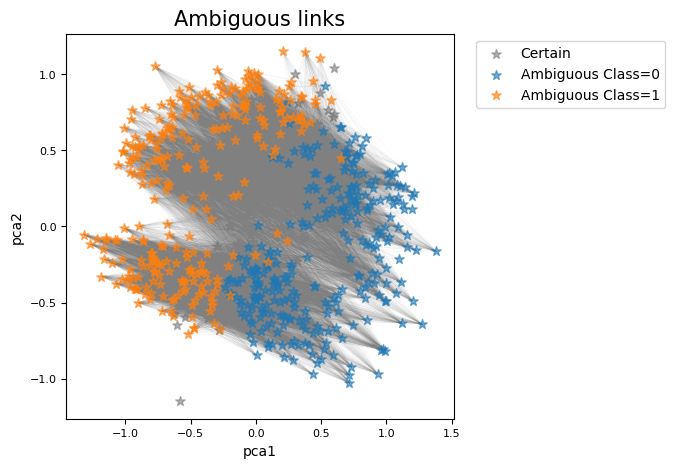

In [7]:
plt_cannotlink_by_labelcolor(data2, DiagnoseResult2.ambiguous_idx, DiagnoseResult2.ambiguous_labels, DiagnoseResult2.cannot_links, alpha=0.6, cl_alpha = 0.1, marker='*', show=True)

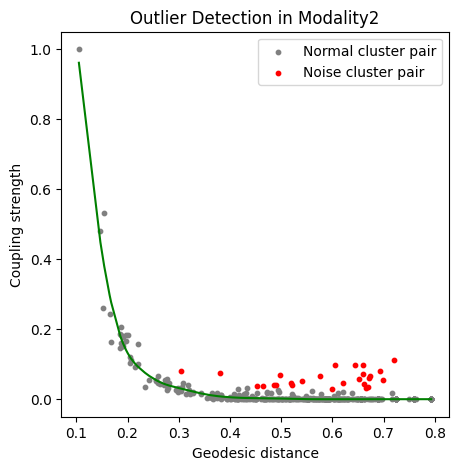

In [8]:
scatter_x = sn2.spline_data.spline_dist
scatter_y = sn2.spline_data.spline_coupling
include_indices = sn2.spline_data.include_indices
exclude_indices = sn2.spline_data.exclude_indices
spline_x = sn2.spline_data.spline_x
spline_y = sn2.spline_data.spline_y
        
plt_fit_spline(scatter_x, scatter_y, include_indices, exclude_indices, spline_x, spline_y, title="Outlier Detection in Modality2", show=True)

### 3. Mapping by SCOT v1 (or any other manifold aligners)

It.  |Err         
-------------------
    0|1.429656e-03|
   10|9.456000e-04|
   20|1.218894e-04|
   30|1.011103e-04|
   40|8.432593e-05|
   50|7.035454e-05|
   60|5.864088e-05|
   70|4.899508e-05|
   80|4.111509e-05|
   90|3.460438e-05|
  100|2.912853e-05|
  110|2.445954e-05|
  120|2.045437e-05|
  130|1.702100e-05|
  140|1.409248e-05|
  150|1.161221e-05|
  160|9.527532e-06|
  170|7.788095e-06|
  180|6.346181e-06|
  190|5.157627e-06|
It.  |Err         
-------------------
  200|4.182563e-06|
  210|3.385792e-06|
  220|2.736820e-06|
  230|2.209625e-06|
  240|1.782277e-06|
  250|1.436465e-06|
  260|1.157027e-06|
  270|9.314793e-07|
  280|7.495942e-07|
  290|6.030276e-07|
  300|4.849911e-07|
  310|3.899764e-07|
  320|3.135226e-07|
  330|2.520228e-07|
  340|2.025644e-07|
  350|1.627975e-07|
  360|1.308283e-07|
  370|1.051309e-07|
  380|8.447721e-08|
  390|6.787854e-08|
It.  |Err         
-------------------
  400|5.453968e-08|
  410|4.382100e-08|
  420|3.520819e-08|
  430|2.828775e-08|
  4

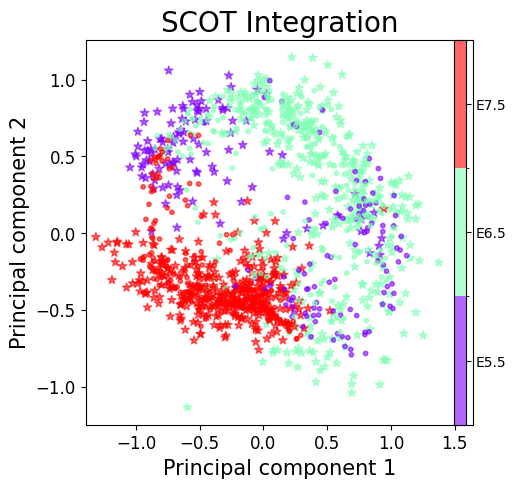

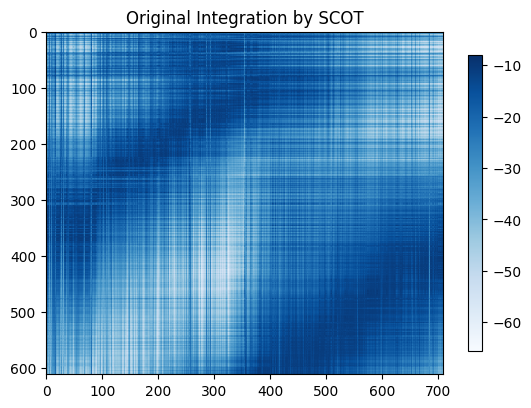

In [10]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
x_aligned, y_aligned = scot.align(k = 120, e=5e-3, mode=params["scot_mode"], metric=params["scot_metric"], normalize=params["norm"])
mapping = scot.coupling

plt_mapping_bio_labels(x_aligned, y_aligned, label1, label2, "Chromatin Accessibility", "DNA Methylation", ["E5.5", "E6.5", "E7.5"], suptitle = "SCOT Integration", a = 0.6, show=True) 
plt_heatmap(np.log(mapping), title="Original Integration by SCOT", show=True)

#### 4. SONATA Corrects the Ambiguous Alignment
We correct ambiguous alignments using the diagnostic results from modality 1 for illustration, though both diagonal results can also be checked.

In [14]:
# check all ambiguous groups in both modalities
acc_best_global=0
for data, DiagnoseResult, modality in [(data1, DiagnoseResult1[0], 1), (data1, DiagnoseResult1[1], 1), (data2, DiagnoseResult2, 2)]:
    alter_mappings = sonata.map_ambiguous_groups(data, DiagnoseResult.ambiguous_labels, DiagnoseResult.ambiguous_idx)
    x_aligned_best, y_aligned_best, best_mapping, acc_best = sonata_best_acc(x_aligned, y_aligned, label1, label2, alter_mappings, mapping, modality)

    if acc_best_global < acc_best:
        x_aligned_best_global = x_aligned_best
        y_aligned_best_global = y_aligned_best
        best_mapping_global = best_mapping

plt_heatmap(np.log(best_mapping_global), title="Corrected Integration", show=True)

TypeError: sonata_best_acc() takes 6 positional arguments but 7 were given